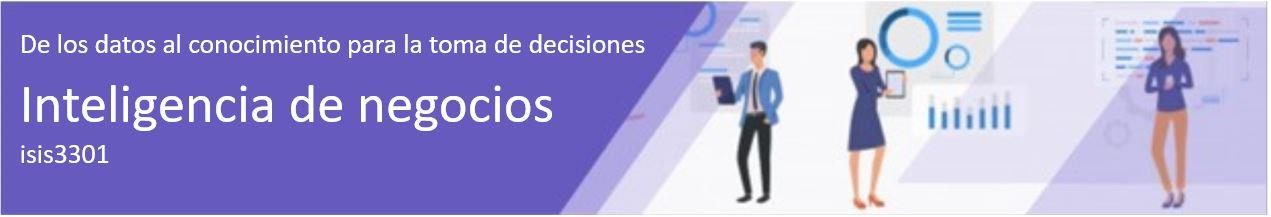

# Laboratorio 1 - Regresión

- ### Estudiante 1: 
- ### Estudiante 2:
- ### Estudiante 3:
-Este notebook presenta el desarrollo de un flujo completo de modelado predictivo orientado a estimar el valor de mercado de jugadores de fútbol a partir de sus estadísticas de rendimiento. Para ello, se sigue la metodología ASUM-DM, abordando de manera estructurada cada una de sus etapas: en primer lugar, se realiza el entendimiento y perfilamiento de los datos, identificando su calidad y las variables más relevantes; posteriormente, se lleva a cabo la preparación y preprocesamiento, resolviendo problemas de consistencia y transformando los datos para el modelado. A continuación, se construye un modelo de regresión lineal, evaluado mediante métricas cuantitativas y validaciones estadísticas, además de una interpretación cualitativa de sus coeficientes. Finalmente, se presentan los resultados de forma clara y se exporta el mejor modelo en un pipeline, junto con las predicciones generadas sobre los datos de prueba, garantizando su reutilización en un entorno de producción.ión.


Este notebook se encuentra dividido en las siguientes secciones:

1. Carga de los datos
2. Entendimiento y limpieza de datos
3. Preparación de datos
4. Modelado
5. Evaluación cuantitativa
6. Evaluación cualitativa
7. Exportar modelo
8. Generar predicc


### TODO BORRAR AL FINAL:

Posible estructura entendimiento y preparación de datoss

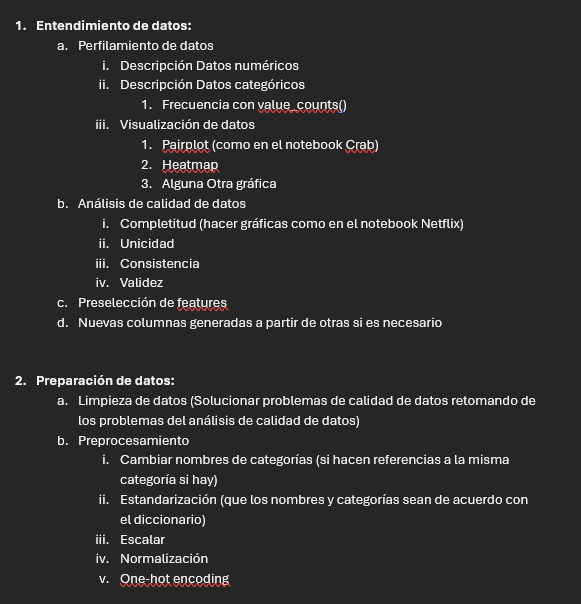

## 1. Carga de los datos

En esta etapa se importan las librerías necesarias, se cargan los datos, y se hace una manipulación básica de los datos 

In [287]:
# Librerias generales

# Pandas
import pandas as pd
pd.set_option('display.max_columns', None) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Número máximo de filas a mostar

# Numpy
import numpy as np

# Persistencia modelo
from joblib import dump, load

# Matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# scipy
import scipy.stats as stats

In [288]:
# Ubicación de la base de datos
db_location = 'datos_entrenamiento_laboratorio1(train_data).csv'

In [289]:
# Cargar los datos
df_players=pd.read_csv(db_location, sep=',', encoding = "ISO-8859-1")

In [290]:
# Dimensiones de los datos
df_players.shape

(57934, 50)

In [291]:
# Ver los datos
display(df_players.sample(5)) # Muestra

,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
50803,Amine Gouiri,dz ALG,AM,24-282,"Sunday November 24, 2024",0,0,0.0,0.0,0.0,0.0,2,26,26,26,8,8,1,1,7,3,0.0,0.0,0.0,3,24,2,0,0,22,22,22,0,0,0,8,0,50.0,1,1,3,2,25,2,1,0,1,50.0,â¬30.00m,30.06.2029
5130,Fabio Carvalho,pt POR,LW,22-113,"Saturday December 21, 2024",0,0,0.0,0.0,0.0,0.0,0,5,5,5,0,0,0,0,1,0,0.0,0.0,0.0,0,5,0,0,1,3,3,3,0,0,0,3,0,NaN,0,0,0,1,4,0,0,1,0,NaN,â¬14.00m,30.06.2029
669,Jack Hinshelwood,eng ENG,"LB,RB",19-142,"Saturday August 31, 2024",0,3,0.2,0.2,0.1,0.1,3,62,62,62,5,5,0,0,15,2,0.1,0.1,0.1,1,54,8,0,5,47,47,47,0,2,0,22,3,NaN,0,1,0,0,48,5,1,5,0,0.0,â¬24.00m,30.06.2028
43811,Junior Ndiaye,fr FRA,FW,19-324,"Sunday February 16, 2025",0,0,0.0,0.0,0.0,0.0,0,2,2,2,0,0,0,0,0,0,0.0,0.0,0.0,0,2,0,0,0,0,0,0,0,0,0,2,1,NaN,0,0,2,0,5,1,1,0,1,50.0,NaN,NaN
12822,Hugo Alvarez,es ESP,"LB,LM",21-055,"Monday August 26, 2024",0,0,0.0,0.0,0.0,0.0,2,25,25,25,4,4,0,0,9,0,0.0,0.0,0.1,0,23,2,0,0,24,24,24,0,0,0,18,0,NaN,0,4,0,0,23,8,1,0,0,NaN,â¬7.50m,30.06.2028


In [292]:
# Imprimimos los diferentes tipos de las columnas
df_players.dtypes

Jugador                            object
Nacionalidad                       object
Posicion                           object
Edad                               object
Dia_partido                        object
Goles                               int64
Tiros Totales                       int64
xG                                float64
npxG                              float64
xAG                               float64
xAG.1                             float64
Acciones_que_crean_tiros            int64
Pases_intentados                    int64
Pases_intentados.1                  int64
Pases_intentados.2                  int64
Pases_progresivos                   int64
Pases_progresivos.1                 int64
Regates_exitosos                    int64
Regates_exitosos.1                  int64
Pases_medios_completados            int64
Pases_largos_completados            int64
xAG.2                             float64
xAG.3                             float64
xA                                

Se puede ver que algunas columnas como market_value, que debería ser de tipo float, o contract_date, que debería ser de tipo Date, no están en el tipo esperado.

## 2. Entendimiento de los datos

En esta etapa se realizan los pasos de perfilamiento y análisis de calidad de datos para determinar si es posible o no abordar el problema con el enfoque analítico propuesto y el esfuerzo que se requiere a nivel de preparación de los datos.

### 2.1 Perfilamiento de datos 

En esta etapa se hace una exploración de los datos, un análisis de la calidad de los mismos y una preselección de atributos

#### 2.1.1 Datos numéricos

In [293]:
# Se obtienen las estadísticas principales de las columnas numéricas
numerical_vars = df_players.select_dtypes(include=['float64', 'int64']).columns
# Calcular estadísticas descriptivas
stats = df_players[numerical_vars].describe().T
# Agregar mediana
stats['median'] = df_players[numerical_vars].median()
df_players.describe()

,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados
count,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,29212.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,36977.000000
mean,0.513015,0.792402,0.088635,0.080473,0.062784,0.062784,1.416750,31.659716,31.659716,31.659716,2.416232,2.416232,0.487451,0.487451,11.226309,2.341941,0.062784,0.062784,0.055056,1.976232,28.593900,2.956140,0.096196,1.133652,25.745624,25.745624,25.745624,0.109677,1.502727,0.041513,9.201091,1.410950,43.171587,0.534522,0.801809,0.950133,0.574033,25.518383,2.382470,0.781337,1.133652,0.834795,48.814187
std,16.440600,1.158538,0.209810,0.186549,0.152033,0.152033,1.727395,22.963272,22.963272,22.963272,2.756341,2.756341,0.897683,0.897683,10.984869,2.867533,0.152033,0.152033,0.122355,2.583320,21.511297,3.733981,0.342576,2.005869,20.703206,20.703206,20.703206,0.345491,2.169317,0.207865,9.322087,1.957006,40.232967,0.934409,1.210875,1.221368,0.931852,19.001270,3.158174,1.005105,2.005869,1.305149,39.560765
min,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,13.000000,13.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,9.000000,9.000000,9.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,28.000000,28.000000,28.000000,2.000000,2.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,1.000000,24.000000,1.000000,0.000000,0.000000,21.000000,21.000000,21.000000,0.000000,1.000000,0.000000,7.000000,1.000000,42.900000,0.000000,0.000000,1.000000,0.000000,22.000000,1.000000,0.000000,0.000000,0.000000,50.000000
75%,0.000000,1.000000,0.100000,0.100000,0.100000,0.100000,2.000000,45.000000,45.000000,45.000000,4.000000,4.000000,1.000000,1.000000,16.000000,3.000000,0.100000,0.100000,0.100000,3.000000,40.000000,4.000000,0.000000,1.000000,37.000000,37.000000,37.000000,0.000000,2.000000,0.000000,14.000000,2.000000,100.000000,1.000000,1.000000,1.000000,1.000000,36.000000,4.000000,1.000000,1.000000,1.000000,100.000000
max,995.000000,12.000000,2.900000,2.900000,2.100000,2.100000,16.000000,171.000000,171.000000,171.000000,30.000000,30.000000,15.000000,15.000000,95.000000,24.000000,2.100000,2.100000,1.400000,37.000000,170.000000,35.000000,8.000000,25.000000,163.000000,163.000000,163.000000,5.000000,21.000000,3.

In [294]:
stats

,count,mean,std,min,25%,50%,75%,max,median
Goles,57934.0,0.513015,16.440600,-5.0,0.0,0.0,0.0,995.0,0.0
Tiros Totales,57934.0,0.792402,1.158538,0.0,0.0,0.0,1.0,12.0,0.0
xG,57934.0,0.088635,0.209810,0.0,0.0,0.0,0.1,2.9,0.0
npxG,57934.0,0.080473,0.186549,0.0,0.0,0.0,0.1,2.9,0.0
xAG,57934.0,0.062784,0.152033,0.0,0.0,0.0,0.1,2.1,0.0
xAG.1,57934.0,0.062784,0.152033,0.0,0.0,0.0,0.1,2.1,0.0
Acciones_que_crean_tiros,57934.0,1.416750,1.727395,0.0,0.0,1.0,2.0,16.0,1.0
Pases_intentados,57934.0,31.659716,22.963272,0.0,13.0,28.0,45.0,171.0,28.0
Pases_intentados.1,57934.0,31.659716,22.963272,0.0,13.0,28.0,45.0,171.0,28.0
Pases_intentados.2,57934.0,31.659716,22.963272,0.0,13.0,28.0,45.0,171.0,28.0


Se puede ver a primera vista errores de consistencia como que el mínimo número de goles sea 5, mientras que el máximo es de 995, para un partido. También se observa la repetición de columnas como xAG y Pases_intentados. Por otra parte, no se reconocen columnas que sean numéricas no ordinales.

#### 2.1.2 Datos categóricos

Para esta parte se revisan las distintas columnas categóricas y las frecuencias relativas de cada valor de algunas de ellas.

In [295]:
# Seleccionar las columnas categóricas
category_cols = df_players.select_dtypes(exclude = ['int','float']).columns
category_cols

#resumen

df_players[category_cols].describe()

,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,market_value,contract_date
count,57934,57902,57934,57886,57934,45040,45018
unique,2242,110,452,7114,198,95,11
top,Vitinha,fr FRA,CB,24-231,"Saturday May 10, 2025",â¬5.00m,30.06.2028
freq,166,9351,9537,37,997,2332,11316


In [296]:
# Se revisan los diferentes valores de la columna contract_date con su respectiva frecuencia relativa e incluyendo los datos nulos
df_players['contract_date'].value_counts(dropna = False, normalize = True)

contract_date
NaN           0.222943
30.06.2028    0.195326
30.06.2026    0.178772
30.06.2027    0.161908
30.06.2029    0.133687
30.06.2030    0.072859
-             0.017002
30.06.2031    0.012134
30.06.2033    0.002209
30.06.2032    0.002089
30.06.2034    0.000570
30.06.2035    0.000501
Name: proportion, dtype: float64

Vemos, por ejemplo, que una gran parte de los valores de la columna contract_date son nulos.

Ahora podemos ver las frecuencias relativas y absolutas por cada tipo de posición

In [297]:
# Split positions and explode into rows
# Hacemos split de las posiciones y aplicacmos explode para separa las diferentes posiciones en rows
positions = df_players["Posicion"].str.split(",").explode()

# vemos las frecuencias absolutas
abs_freq = positions.value_counts()
abs_freq

Posicion
CB    10436
FW     8339
CM     7964
DM     5316
AM     5076
LW     4255
RB     4179
RW     4149
LB     3997
GK     3987
LM     2996
RM     2976
WB     2658
Name: count, dtype: int64

In [298]:
# vemos las frecuencias relativas:
rel_freq = positions.value_counts(dropna = False, normalize = True)
rel_freq

Posicion
CB    0.157339
FW    0.125724
CM    0.120070
DM    0.080147
AM    0.076529
LW    0.064151
RB    0.063005
RW    0.062553
LB    0.060261
GK    0.060110
LM    0.045169
RM    0.044868
WB    0.040074
Name: proportion, dtype: float64

#### 2.1.3 Visualizaciones

Primero veremos un scatter plot de market_value versus lsa columnas numéricas, para visualizar la correlación entre las variables de entrada y la variable objetivo.

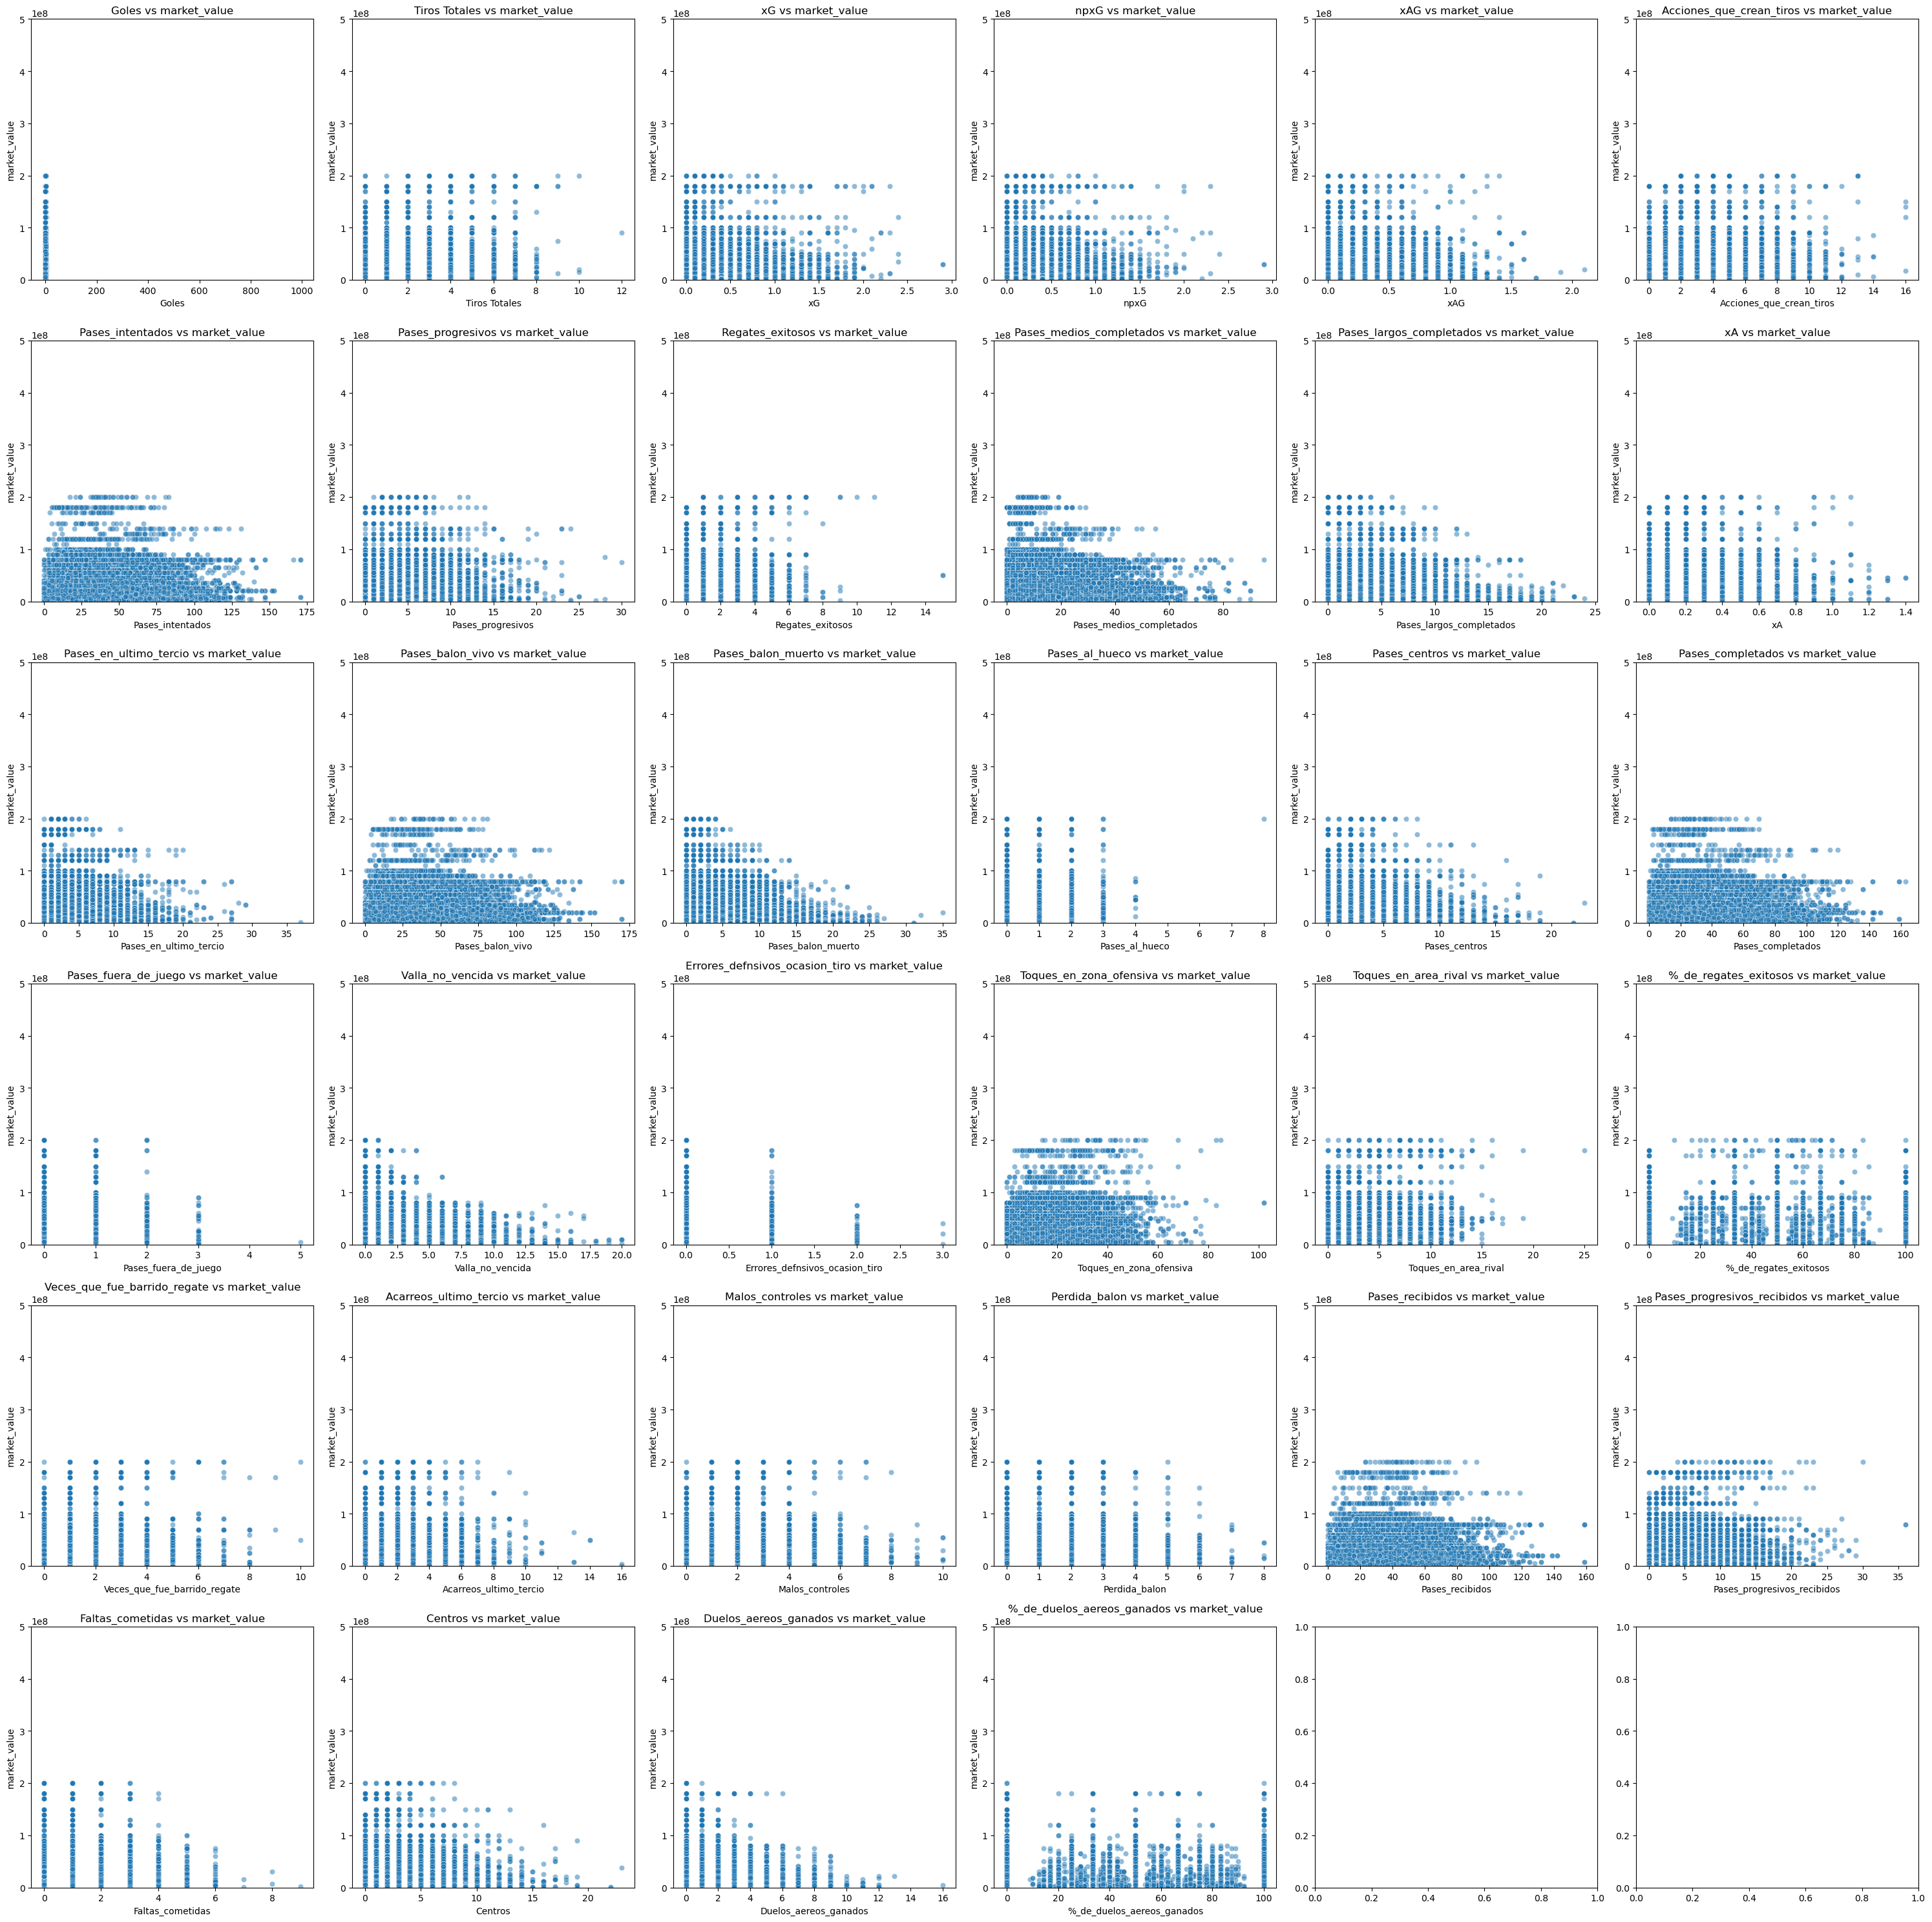

In [299]:
# Duplicamos el data set
df_copy = df_players.copy()

#df_copy.columns = make_unique(df_copy.columns)

# Función para limpiar el market_value
def limpiar_market_value(val):
    if pd.isna(val):
        return np.nan
    val = str(val).strip()
    if val in ["-", "error", ""]:
        return np.nan

    # Eliminar los primeros 3 valores con caracteres especiales
    val = val[3:] if len(val) > 3 else val

    # transformamos de millones a miles
    try:
        if val.endswith("m"):  
            return float(val[:-1]) * 1_000_000
        elif val.endswith("k"):  
            return float(val[:-1]) * 1_000
        else:  
            return float(val)
    except ValueError:
        return np.nan

df_copy["market_value"] = df_copy["market_value"].apply(limpiar_market_value)

# borramos los duplicados
df_copy = df_copy.loc[:, ~df_copy.columns.duplicated()]

# Obtenemos las columnas numéricas
numeric_cols = df_copy.select_dtypes(include = ['int','float']).columns

# Quitamos market value de las duplicadas
numeric_cols = numeric_cols.drop("market_value")
numeric_cols = numeric_cols.drop(["xAG.1", "Pases_intentados.1", "Pases_intentados.2", "Regates_exitosos.1", 
                                          "Pases_progresivos.1", "xAG.2", "xAG.3", "Pases_completados.1", "Pases_completados.2"])

# Hacemos scatter plot por cada variable 

n_features = len(numeric_cols)
cols_per_row = 6
rows = 6

fig, axes = plt.subplots(rows, cols_per_row, figsize=(5*cols_per_row, 5*rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.scatterplot(
        data=df_copy, 
        x=col, 
        y="market_value", 
        alpha=0.5, 
        ax=axes[i]
    )
    axes[i].set_title(f"{col} vs market_value")
    axes[i].set_ylim(0, 5e8)


plt.tight_layout()
plt.show()


Comenzemos haciendo un poco de Limpiza de los datos para obtener un analisis más significativo

Primero, nos deshacemos de columnas repetidas:

In [300]:
# Conteo de filas duplicadas completas
num_duplicados = df_players.duplicated().sum()
print(f"Número de filas duplicadas completas: {num_duplicados}")

# Definir variables para duplicados parciales según semántica
variables_para_duplicados_parciales = ['Pases_centros', 'Centros']
variables_para_duplicados_parciales_2 = ['Toques_en_zona_ofensiva', 'Toques_en_area_rival']

# Duplicados según el primer set
duplicados_set1 = df_players.duplicated(subset=variables_para_duplicados_parciales, keep=False)
num_dup_set1 = duplicados_set1.sum()
print(f"Número de filas duplicadas (según {variables_para_duplicados_parciales}): {num_dup_set1}")
display(df_players[duplicados_set1].head())

# Duplicados según el segundo set
duplicados_set2 = df_players.duplicated(subset=variables_para_duplicados_parciales_2, keep=False)
num_dup_set2 = duplicados_set2.sum()
print(f"Número de filas duplicadas (según {variables_para_duplicados_parciales_2}): {num_dup_set2}")
display(df_players[duplicados_set2].head())


Número de filas duplicadas completas: 10483
Número de filas duplicadas (según ['Pases_centros', 'Centros']): 57932


,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
0,Bruno Fernandes,pt POR,"FW,AM",29-343,"Friday August 16, 2024",0,6,1.2,1.2,0.0,0.0,2,60,60,60,6,6,1,1,14,4,0.0,0.0,0.0,4,51,8,0,8,43,43,43,1,0,0,36,3,100.0,0,5,1,2,51,7,0,8,0,0.0,â¬50.00m,30.06.2027
1,Marcus Rashford,eng ENG,LW,26-290,"Friday August 16, 2024",0,0,0.0,0.0,0.7,0.7,1,30,30,30,2,2,0,0,2,1,0.7,0.7,0.1,2,30,0,0,1,22,22,22,0,1,0,26,4,0.0,5,1,2,1,37,9,1,1,1,100.0,â¬50.00m,30.06.2026
2,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",0,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,-,30.06.2027
3,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",-5,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,â¬1000.00m,30.06.2030
4,Alejandro Garnacho,ar ARG,RW,20-046,"Friday August 16, 2024",0,2,0.7,0.7,0.2,0.2,3,11,11,11,0,0,0,0,3,0,0.2,0.2,0.1,0,11,0,0,1,10,10,10,0,1,0,10,3,0.0,1,0,2,1,12,3,0,1,1,50.0,â¬45.00m,30.06.2028


Número de filas duplicadas (según ['Toques_en_zona_ofensiva', 'Toques_en_area_rival']): 57820


,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
0,Bruno Fernandes,pt POR,"FW,AM",29-343,"Friday August 16, 2024",0,6,1.2,1.2,0.0,0.0,2,60,60,60,6,6,1,1,14,4,0.0,0.0,0.0,4,51,8,0,8,43,43,43,1,0,0,36,3,100.0,0,5,1,2,51,7,0,8,0,0.0,â¬50.00m,30.06.2027
1,Marcus Rashford,eng ENG,LW,26-290,"Friday August 16, 2024",0,0,0.0,0.0,0.7,0.7,1,30,30,30,2,2,0,0,2,1,0.7,0.7,0.1,2,30,0,0,1,22,22,22,0,1,0,26,4,0.0,5,1,2,1,37,9,1,1,1,100.0,â¬50.00m,30.06.2026
2,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",0,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,-,30.06.2027
3,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",-5,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,â¬1000.00m,30.06.2030
4,Alejandro Garnacho,ar ARG,RW,20-046,"Friday August 16, 2024",0,2,0.7,0.7,0.2,0.2,3,11,11,11,0,0,0,0,3,0,0.2,0.2,0.1,0,11,0,0,1,10,10,10,0,1,0,10,3,0.0,1,0,2,1,12,3,0,1,1,50.0,â¬45.00m,30.06.2028


In [301]:
# Columnas repetidas
df_clean = df_players.drop(['xAG.1',
        'Pases_intentados.1',
        'Pases_intentados.2',
        'Pases_progresivos.1',
        'Regates_exitosos.1',
        'xAG.2',
        'xAG.3',
        'Pases_completados.1',
        'Pases_completados.2',
        'Centros',
        'Toques_en_area_rival'
        ], axis=1)

Hay unas columnas que claramente están correlacionadas las unas a las otras. Por ejemplo, el número de pases exitosos claramente está relacionada al número de pases largos exitosos, por lo cual vamos a deshacernos de las variables claramente correlacionadas

In [302]:
df_clean = df_clean.drop([
            'Pases_balon_vivo',
            'Pases_balon_muerto',
            'Pases_fuera_de_juego',
            'Pases_completados'
            ], axis=1)

In [303]:
# 1. Filtrar las filas con valores "error"
df_clean = df_clean[df_clean["market_value"] != "error"]

# 2. Aplicar tu función de limpieza
df_clean["market_value"] = df_clean["market_value"].apply(limpiar_market_value)

# 3. Asegurarte de que sea numérico (por si limpiar_market_value devuelve strings)
df_clean["market_value"] = pd.to_numeric(df_clean["market_value"], errors="coerce")

# 4. Eliminar las filas que quedaron con NaN en esa columna
df_clean = df_clean.dropna(subset=["market_value"])

# 5. Revisar el resultado
print(df_clean["market_value"].head())


0    5.000000e+07
1    5.000000e+07
3    1.000000e+09
4    4.500000e+07
5    2.800000e+07
Name: market_value, dtype: float64


In [304]:
agg_dict = {
    "Goles": ["sum","mean"],
    "Tiros Totales": ["sum","mean"],
    "xG": "sum",
    "npxG": "sum",
    "xAG": "sum",
    "xA": "sum",
    "Acciones_que_crean_tiros": "sum",
    "Pases_intentados": "sum",
    "Pases_progresivos": ["sum","mean"],
    "Regates_exitosos": "sum",
    "Pases_medios_completados": ["sum","mean"],
    "Pases_largos_completados": ["sum","mean"],
    "Pases_en_ultimo_tercio": "sum",
    "Pases_al_hueco": ["sum","mean"],
    "Pases_centros": ["sum","mean"],
    "Valla_no_vencida": ["sum","mean"],
    "Errores_defnsivos_ocasion_tiro": ["sum","mean"],
    "Toques_en_zona_ofensiva": ["sum","mean"],
    "%_de_regates_exitosos": "mean",
    "Acarreos_ultimo_tercio": "sum",
    "Pases_recibidos": ["sum","mean"],
    "Pases_progresivos_recibidos": "sum",
    "Duelos_aereos_ganados": "sum",
    "%_de_duelos_aereos_ganados": "mean",
    "market_value": "max"

}

df_players_comb = df_clean.groupby("Jugador", as_index=False).agg(agg_dict)
df_players_comb.head()

Jugador Goles           Tiros Totales             xG npxG  \
                           sum      mean           sum      mean  sum  sum   
0  Aaron Ciammaglichella     0  0.000000             0  0.000000  0.0  0.0   
1           Aaron Martin     0  0.000000            16  0.444444  0.6  0.6   
2         Aaron Ramsdale     0  0.000000             0  0.000000  0.0  0.0   
3       Aaron WanBissaka     2  0.054054            16  0.432432  0.9  0.9   
4           Abakar Sylla     2  0.047619            10  0.238095  1.0  1.0   

   xAG   xA Acciones_que_crean_tiros Pases_intentados Pases_progresivos  \
   sum  sum                      sum              sum               sum   
0  0.0  0.0                        0                0                 0   
1  5.4  5.8                       95             1685                90   
2  0.0  0.0                        6             2446                 0   
3  3.4  2.3                       95             1822               149   
4  0.2  0.0                        8             1316                42   

            Regates_exitosos Pases_medios_completados             \
       mean              sum                      sum       mean   
0  0.000000                0                        0   0.000000   
1  2.500000               12                      557  15.472222   
2  0.000000                0                      604  10.066667   
3  4.027027               66                      450  12.162162   
4  1.000000                6                      664  15.809524   

  Pases_largos_completados           Pases_en_ultimo_tercio Pases_al_hueco  \
                       sum      mean                    sum            sum   
0                        0  0.000000                      0              0   
1                      160  4.444444                     77              0   
2                      514  8.566667                     72              0   
3                       48  1.297297                     94              5   
4                       44  1.047619                     42              0   

            Pases_centros           Valla_no_vencida            \
       mean           sum      mean              sum      mean   
0  0.000000             0  0.000000                0  0.000000   
1  0.000000           256  7.111111               73  2.027778   
2  0.000000             0  0.000000               20  0.333333   
3  0.135135            76  2.054054              126  3.405405   
4  0.000000             2  0.047619              126  3.000000   

  Errores_defnsivos_ocasion_tiro           Toques_en_zona_ofensiva             \
                             sum      mean                     sum       mean   
0                              0  0.000000                       0   0.000000   
1                              1  0.027778                     608  16.888889   
2                              6  0.100000                       0   0.000000   
3                              0  0.000000                     638  17.243243   
4                              0  0.000000                      52   1.238095   

  %_de_regates_exitosos Acarreos_ultimo_tercio Pases_recibidos             \
                   mean                    sum             sum       mean   
0                   NaN                      0               0   0.000000   
1             42.158824                     31            1039  28.861111   
2                   NaN                      0            1404  23.400000   
3             55.870588                     65            1325  35.810811   
4             60.000000                      2             994  23.666667   

  Pases_progresivos_recibidos Duelos_aereos_ganados  \
                          sum                   sum   
0                           0                     0   
1                         108                    20   
2                           0                    12   
3                         167                    22   
4                  

In [305]:
# ahora añades la cuenta de repeticiones
df_players_no_nan = df_players.dropna(subset=["market_value"])
# Contar repeticiones por jugador (sin valores NaN en market_value)
repeticiones = df_players_no_nan.groupby("Jugador").size()

# Asignar a df_players_comb usando el nombre del jugador como clave
df_players_comb["Repeticiones"] = df_players_comb["Jugador"].map(repeticiones)


In [306]:
df_players_comb.head()

Jugador Goles           Tiros Totales             xG npxG  \
                           sum      mean           sum      mean  sum  sum   
0  Aaron Ciammaglichella     0  0.000000             0  0.000000  0.0  0.0   
1           Aaron Martin     0  0.000000            16  0.444444  0.6  0.6   
2         Aaron Ramsdale     0  0.000000             0  0.000000  0.0  0.0   
3       Aaron WanBissaka     2  0.054054            16  0.432432  0.9  0.9   
4           Abakar Sylla     2  0.047619            10  0.238095  1.0  1.0   

   xAG   xA Acciones_que_crean_tiros Pases_intentados Pases_progresivos  \
   sum  sum                      sum              sum               sum   
0  0.0  0.0                        0                0                 0   
1  5.4  5.8                       95             1685                90   
2  0.0  0.0                        6             2446                 0   
3  3.4  2.3                       95             1822               149   
4  0.2  0.0                        8             1316                42   

            Regates_exitosos Pases_medios_completados             \
       mean              sum                      sum       mean   
0  0.000000                0                        0   0.000000   
1  2.500000               12                      557  15.472222   
2  0.000000                0                      604  10.066667   
3  4.027027               66                      450  12.162162   
4  1.000000                6                      664  15.809524   

  Pases_largos_completados           Pases_en_ultimo_tercio Pases_al_hueco  \
                       sum      mean                    sum            sum   
0                        0  0.000000                      0              0   
1                      160  4.444444                     77              0   
2                      514  8.566667                     72              0   
3                       48  1.297297                     94              5   
4                       44  1.047619                     42              0   

            Pases_centros           Valla_no_vencida            \
       mean           sum      mean              sum      mean   
0  0.000000             0  0.000000                0  0.000000   
1  0.000000           256  7.111111               73  2.027778   
2  0.000000             0  0.000000               20  0.333333   
3  0.135135            76  2.054054              126  3.405405   
4  0.000000             2  0.047619              126  3.000000   

  Errores_defnsivos_ocasion_tiro           Toques_en_zona_ofensiva             \
                             sum      mean                     sum       mean   
0                              0  0.000000                       0   0.000000   
1                              1  0.027778                     608  16.888889   
2                              6  0.100000                       0   0.000000   
3                              0  0.000000                     638  17.243243   
4                              0  0.000000                      52   1.238095   

  %_de_regates_exitosos Acarreos_ultimo_tercio Pases_recibidos             \
                   mean                    sum             sum       mean   
0                   NaN                      0               0   0.000000   
1             42.158824                     31            1039  28.861111   
2                   NaN                      0            1404  23.400000   
3             55.870588                     65            1325  35.810811   
4             60.000000                      2             994  23.666667   

  Pases_progresivos_recibidos Duelos_aereos_ganados  \
                          sum                   sum   
0                           0                     0   
1                         108                    20   
2                           0                    12   
3                         167                    22   
4                  

In [310]:
print(df_players_comb["market_value"].columns)
df_players_comb["market_value_num"] = pd.to_numeric(
    df_players_comb["market_value"]["max"], errors="coerce"
)

Index(['max'], dtype='object')


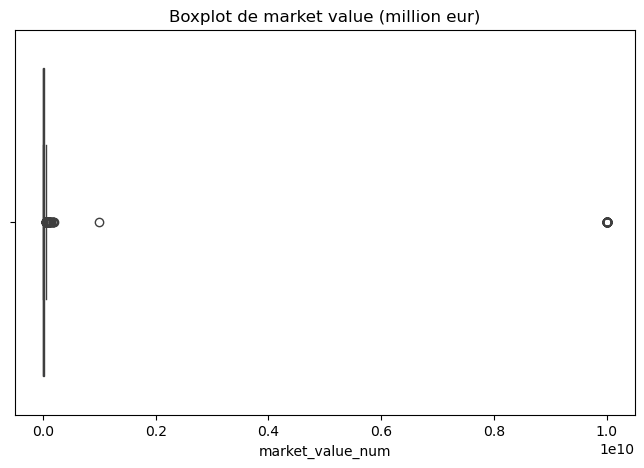

In [312]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_players_comb, x="market_value_num")
plt.title("Boxplot de market value (million eur)")
plt.show()


Con esto podemos deshacernos de valores que se salen de proporción y probablemente son errores al meter los datos a la base de datos

In [316]:
df_players_comb = df_players_comb[
    (df_players_comb["market_value_num"] <= 0.4*10**9)
]


In [317]:
df_players_comb["market_value_num"] = pd.to_numeric(
    df_players_comb["market_value"]["max"], errors="coerce"
)

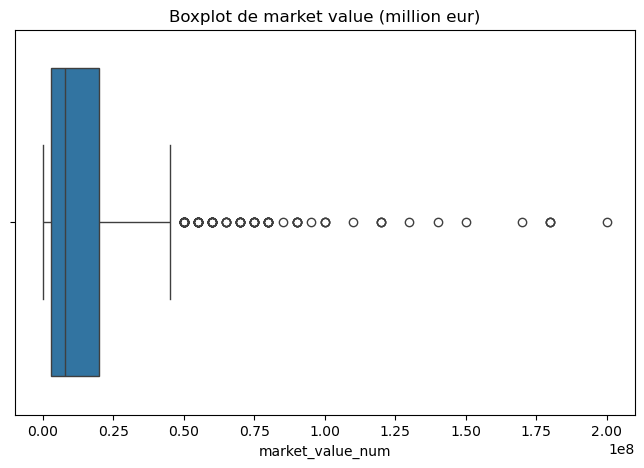

In [318]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_players_comb, x="market_value_num")
plt.title("Boxplot de market value (million eur)")
plt.show()


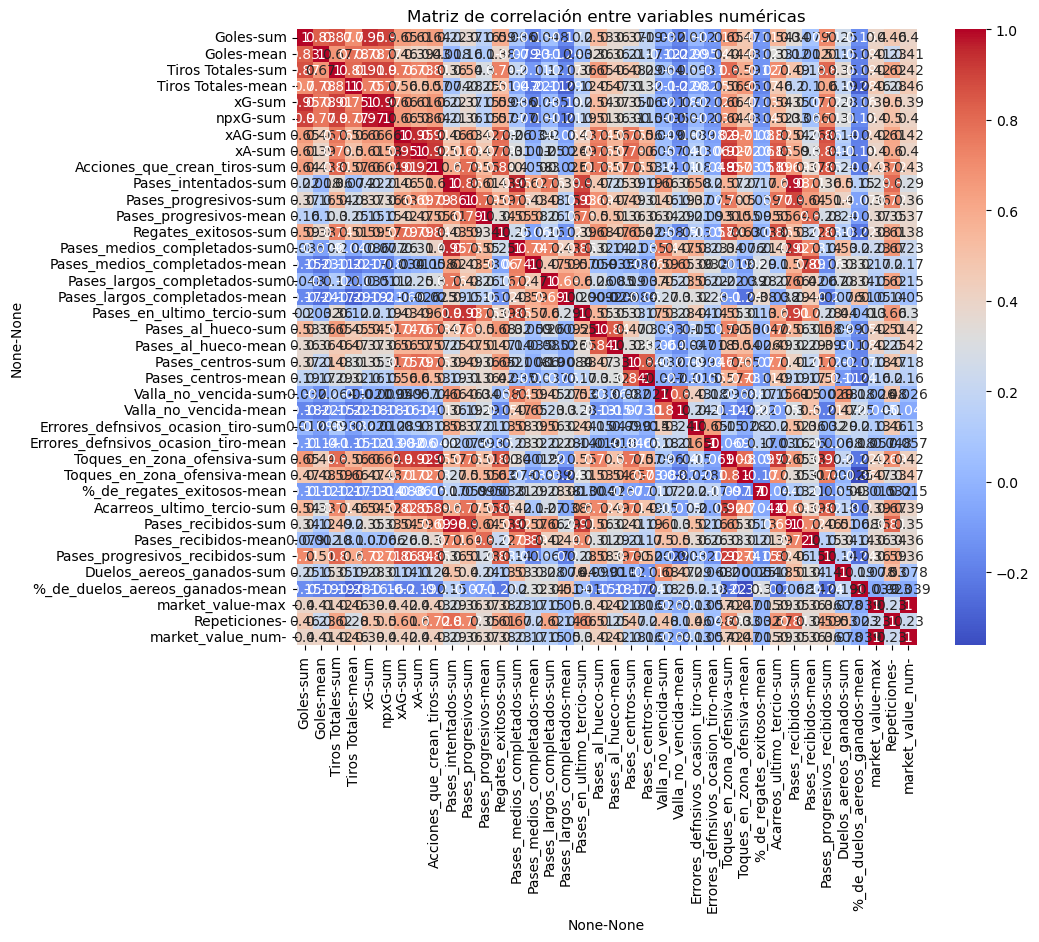

In [319]:
corr_matrix = df_players_comb.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()